# Kaggle 자전거 데이터
- https://www.kaggle.com/c/bike-sharing-demand
- 데이터 분석 및 성능 향상을 위한 전처리

## 기본 방식

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv("data/bike.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## datetime 데이터를 string에서 datetime 으로 타입 변경

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])

## 결측치 확인

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 날짜 데이터를 활용한 열 추가

In [8]:
datetime = train["datetime"]

In [9]:
train["year"] = datetime.dt.year
train["year"].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [10]:
train["month"] = datetime.dt.month
train["month"].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [11]:
train["day"] = datetime.dt.day
train["day"].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [12]:
train["hour"] = datetime.dt.hour
train["hour"].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [13]:
train["minute"] = datetime.dt.minute
train["minute"].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [14]:
train["second"] = datetime.dt.second
train["second"].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [24]:
train["dayofweek"] = datetime.dt.dayofweek
train["dayofweek"].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

In [30]:
def set_workingday(x):
    if x<5:
        return 1
    else:
        return 0

In [31]:
train["workingday"] = train.apply(lambda x: set_workingday(x['dayofweek']), axis = 1)
train["workingday"].head()

0    0
1    0
2    0
3    0
4    0
Name: workingday, dtype: int64

In [32]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


## year 컬럼을 기준으로 count 값 비교

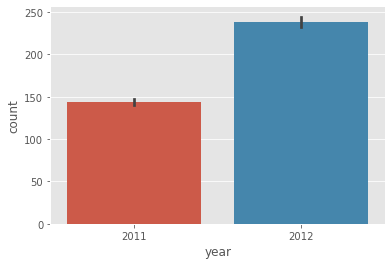

In [16]:
sns.barplot(data = train, x="year", y="count")

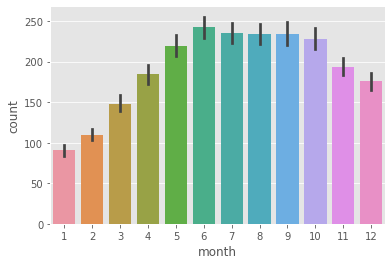

In [18]:
sns.barplot(data = train, x="month", y="count")

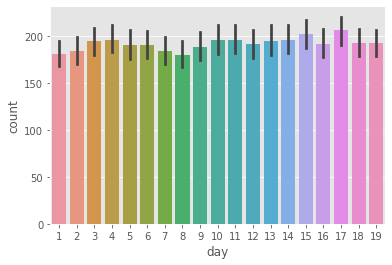

In [19]:
sns.barplot(data = train, x="day", y="count")

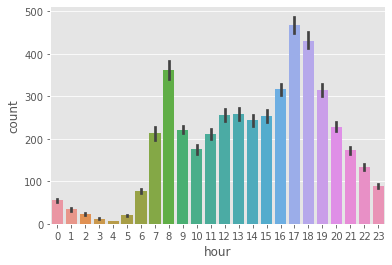

In [20]:
sns.barplot(data = train, x="hour", y="count")

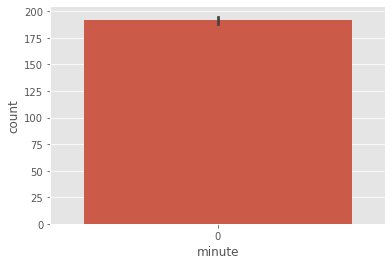

In [21]:
sns.barplot(data = train, x="minute", y="count")

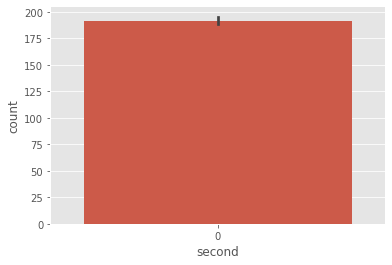

In [22]:
sns.barplot(data = train, x="second", y="count")

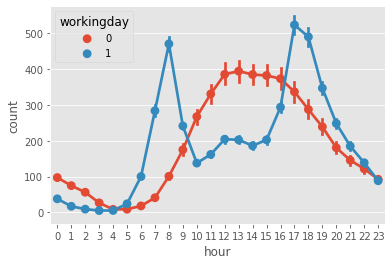

In [33]:
sns.pointplot(data = train, x="hour", y="count", hue="workingday")

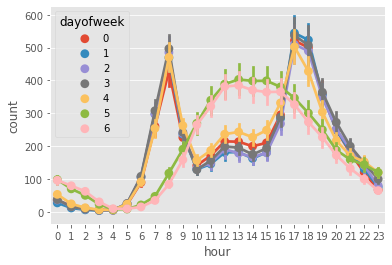

In [29]:
sns.pointplot(data = train, x="hour", y="count", hue="dayofweek")

- 1=맑음,약간 구름낀 흐림
- 2=안개, 안개+흐림
- 3=가벼운눈, 가벼운비+천둥
- 4=심한눈/비, 천둥/번개

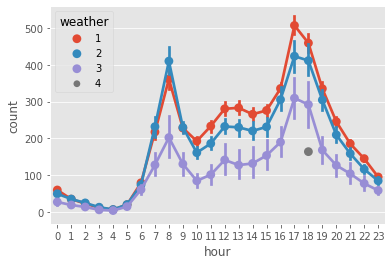

In [34]:
sns.pointplot(data=train, x="hour", y="count", hue="weather")

- 1=봄, 2=여름, 3=가을, 4=겨울


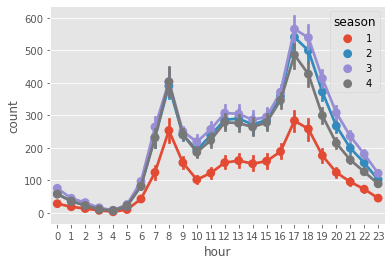

In [35]:
sns.pointplot(data=train, x="hour", y="count", hue="season")

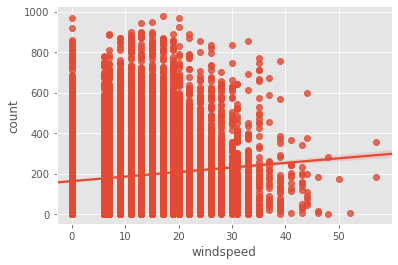

In [36]:
sns.regplot(x="windspeed", y="count", data=train)

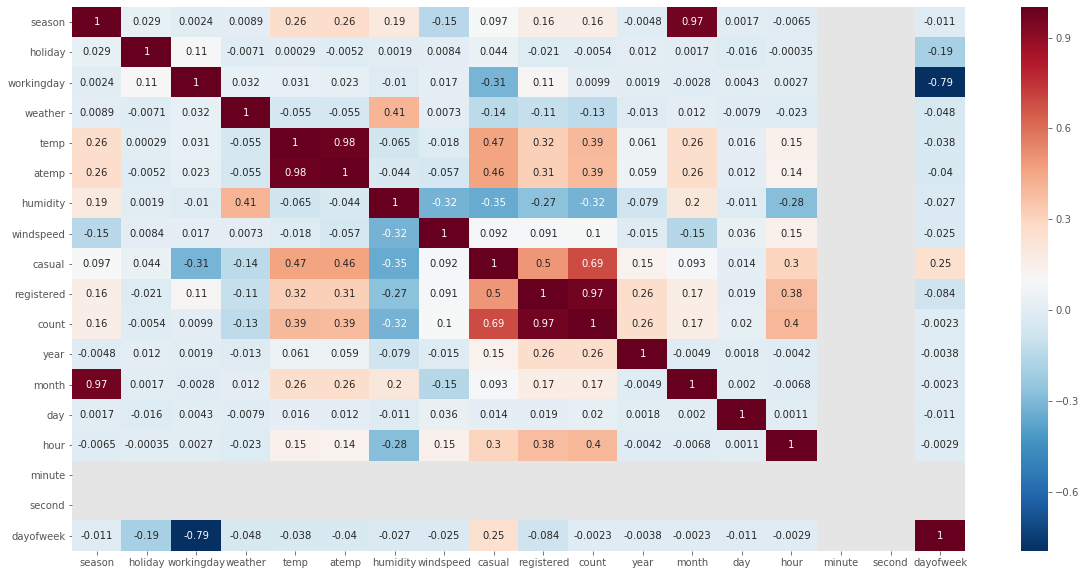

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r")

## count 값의 이상치 제거

In [70]:
Q1 = train['count'].quantile(0.25)
Q3 = train['count'].quantile(0.75)
IQR = Q3-Q1
train_outlier = train[ (train['count'] >= Q1 - 1.5*IQR) & train['count'] <= Q3 + 1.5 * IQR]

In [71]:
train_outlier.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


## 데이터 정규화

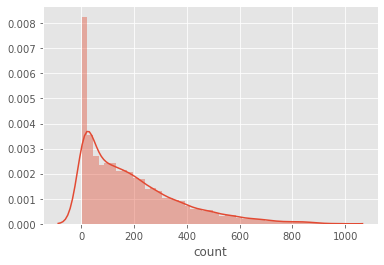

In [42]:
sns.distplot(train_outlier["count"])

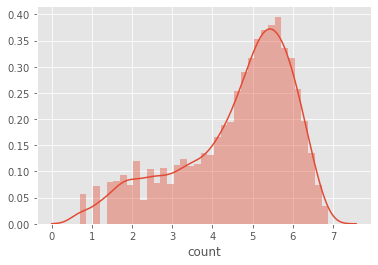

In [43]:
train_outlier["count"] = np.log1p(train["count"])
sns.distplot(train_outlier["count"])

## 선형회귀

In [44]:
y = train_outlier["count"]
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [45]:
X = train_outlier
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,0,5


In [46]:
X.pop("count")
X.pop("datetime")
X.pop("registered")
X.pop("day")
X.pop("minute")
X.pop("second")

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

## 데이터 나누기

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred = model.predict(X_train)

In [51]:
model.score(X_train, y_train)

0.5682020486644732

In [52]:
from sklearn.metrics import mean_squared_error
print("MSE : ", mean_squared_error(pred, y_train))

MSE :  0.8716793031508859


In [67]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,year,month,hour,dayofweek
4717,4,0,1,1,21.32,25.000,45,15.0013,21,2011,11,15,2
3649,3,0,1,2,26.24,30.305,73,11.0014,30,2011,9,23,4
10134,4,0,1,2,13.12,15.150,53,19.9995,20,2012,11,15,2
4243,4,0,0,1,21.32,25.000,77,7.0015,78,2011,10,20,5
3817,3,0,0,2,25.42,27.275,94,0.0000,16,2011,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9720,4,0,1,2,17.22,21.210,77,15.0013,37,2012,10,9,1
9919,4,0,1,1,22.96,26.515,52,12.9980,70,2012,10,16,2
1490,2,0,1,1,15.58,19.695,76,16.9979,9,2011,4,23,3
9412,3,0,0,1,27.88,31.820,36,12.9980,327,2012,9,13,5


In [53]:
pred = model.predict(X_test)

print("MSE : ", mean_squared_error(pred, y_test))

MSE :  0.8911052802836906


In [54]:
model.score(X_test, y_test)

0.5541018539402346

# 성능 올리기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B40F2C9248>,
      dtype=object)

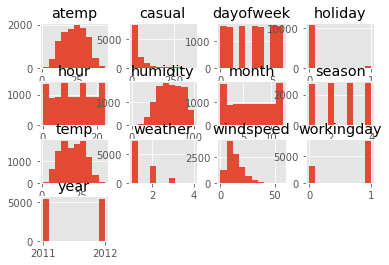

In [57]:
train_outlier.hist()

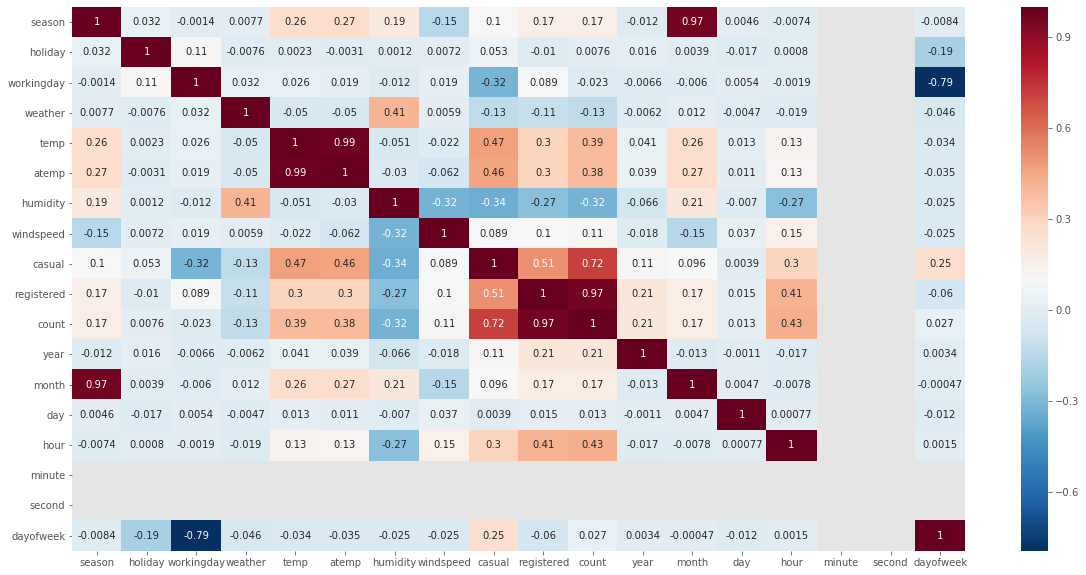

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train_outlier.corr(), annot=True, cmap="RdBu_r")

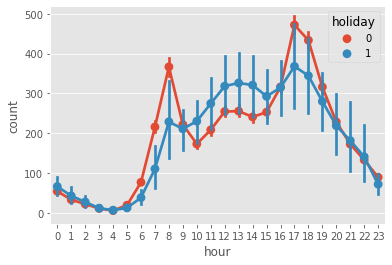

In [64]:
sns.pointplot(data = train, x="hour", y="count", hue="holiday")

In [66]:
train_outlier['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

# 기온을 표준화 하기

In [151]:
#나쁘지 않은듯..?
train_outlier["temp"] = (train["temp"]-train["temp"].mean())/train["temp"].std()


c:\library\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# windspeed에서 0의 값을 온도, 습도, weather를 통해서 예측하자

In [161]:
wind_data = train_outlier[ train_outlier["windspeed"] != 0]
Q1 = wind_data["windspeed"].quantile(0.25)
Q3 = wind_data["windspeed"].quantile(0.75)
IQR = Q3-Q1
wind_data = wind_data[ (wind_data["windspeed"] >= Q1 - 1.5*IQR) & (wind_data["windspeed"] <= Q3 + 1.5 * IQR)]

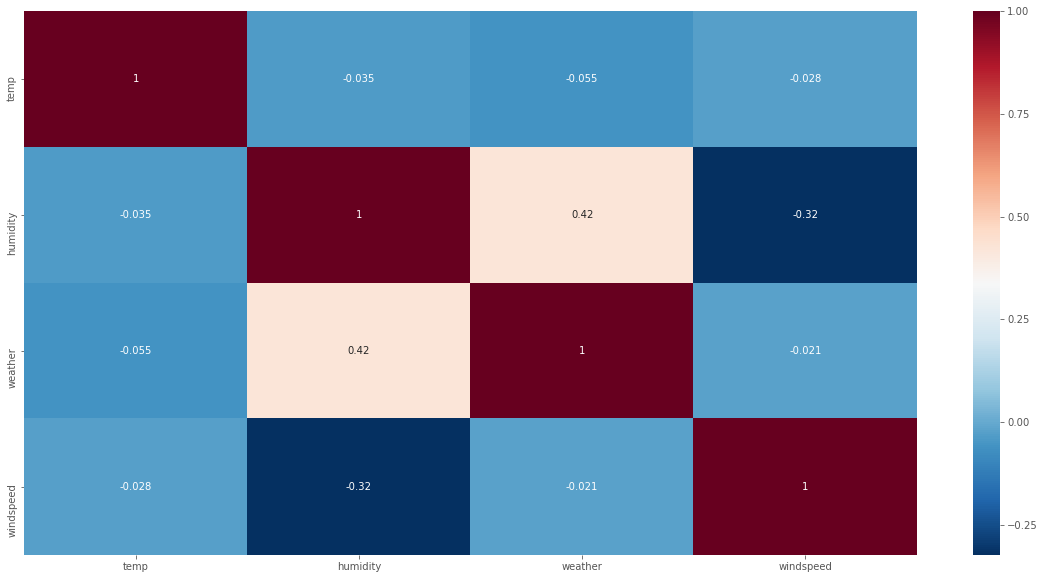

In [166]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(wind_data.loc[:,["temp", "humidity", "weather", "windspeed"]].corr(), annot=True, cmap="RdBu_r")

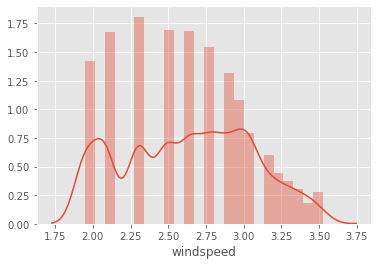

In [158]:
wind_data["windspeed"] = np.log1p(wind_data["windspeed"])
sns.distplot(wind_data["windspeed"])

In [164]:
wind_x = wind_data.loc[:,["temp", "humidity", "weather"]]
wind_y = wind_data["windspeed"]

# 상관계수도 낮고, 정확도도 떨어져서 사용이 안될 듯

In [160]:
wind_x_train, wind_x_test, wind_y_train, wind_y_test = train_test_split(wind_x, wind_y, test_size=0.2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(wind_x_train, wind_y_train)

pred = model.predict(wind_x_train)

from sklearn.metrics import mean_squared_error
print("MSE : ", mean_squared_error(pred, wind_y_train))

print("Score : ", model.score(wind_x_train, wind_y_train))

pred = model.predict(wind_x_test)

print("MSE : ", mean_squared_error(pred, wind_y_test))

print("Score : ", model.score(wind_x_test, wind_y_test))

MSE :  0.15993953546343317
Score :  0.1254772047285294
MSE :  0.15955448404343
Score :  0.10578612558861113


## 테스트 하기전 데이터 초기화 부분

In [168]:
Q1 = train['count'].quantile(0.25)
Q3 = train['count'].quantile(0.75)
IQR = Q3-Q1
train_outlier = train[ (train['count'] >= Q1 - 1.5*IQR) & (train['count'] <= Q3 + 1.5 * IQR)]

# 테스트 하기 위한 코드 부분

In [152]:
from sklearn.model_selection import train_test_split


X = train_outlier
y = train_outlier["count"]

X.pop("casual")
X.pop("count")
X.pop("datetime")
X.pop("registered")
X.pop("day")
X.pop("minute")
X.pop("second")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print("MSE : ", mean_squared_error(pred, y_train))

print("Score : ", model.score(X_train, y_train))

pred = model.predict(X_test)

print("MSE : ", mean_squared_error(pred, y_test))

print("Score : ", model.score(X_test, y_test))

MSE :  14935.427124629126
Score :  0.39279645851734757
MSE :  14302.452965961447
Score :  0.4000762148513182


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print("MSE : ", mean_squared_error(pred, y_train))

print("Score : ", model.score(X_train, y_train))

pred = model.predict(X_test)

print("MSE : ", mean_squared_error(pred, y_test))

print("Score : ", model.score(X_test, y_test))

MSE :  12781.280215821365
Score :  0.6076029428602266
MSE :  13148.422205960613
Score :  0.6103258884960493


In [105]:
train_outlier

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,-1.333599,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,-1.438841,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,-1.438841,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,-1.333599,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,-1.333599,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,-0.596908,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,-0.702149,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,-0.807391,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,-0.807391,17.425,61,6.0032,2012,12,22,2
